<a href="https://colab.research.google.com/github/Monalisa2811/FaceMaskDetection/blob/main/DL_PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

**Importing Face Mask Dataset**

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:00<00:00, 211MB/s]
100% 163M/163M [00:00<00:00, 199MB/s]


In [ ]:
# Extracting the compressed DataSet
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# what are the data present in the project (inside "drive" our kaggle folder is available and inside that the kaggle.json file is placed)
!ls

data  drive  face-mask-dataset.zip  sample_data


**Importing the dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2241.jpg', 'with_mask_3386.jpg', 'with_mask_1404.jpg', 'with_mask_3001.jpg', 'with_mask_333.jpg']
['with_mask_232.jpg', 'with_mask_1016.jpg', 'with_mask_2566.jpg', 'with_mask_85.jpg', 'with_mask_1234.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_89.jpg', 'without_mask_1537.jpg', 'without_mask_1734.jpg', 'without_mask_2373.jpg', 'without_mask_614.jpg']
['without_mask_3384.jpg', 'without_mask_2920.jpg', 'without_mask_638.jpg', 'without_mask_1010.jpg', 'without_mask_2388.jpg']


In [ ]:
print("Number of with mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask -->1
without mask -->0

In [ ]:
# create the labels

with_mask_labels=[1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

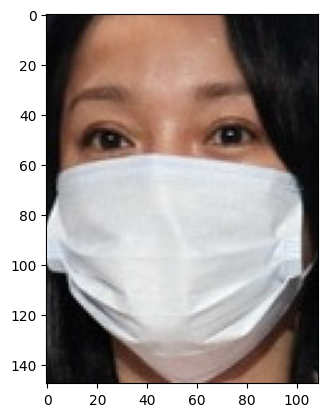

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1654.jpg')
imgplot = plt.imshow(img)
plt.show()

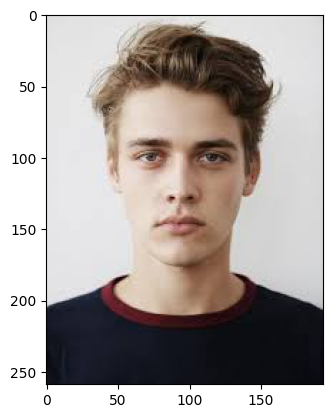

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3526.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []
label = []


for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
  label.append(1)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)  
  label.append(0)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:

type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[228, 220, 235],
        [228, 220, 235],
        [227, 219, 234],
        ...,
        [250, 243, 251],
        [254, 247, 254],
        [254, 250, 255]],

       [[228, 220, 235],
        [227, 219, 234],
        [226, 218, 233],
        ...,
        [247, 240, 248],
        [253, 247, 254],
        [254, 250, 254]],

       [[226, 216, 232],
        [226, 217, 232],
        [226, 216, 232],
        ...,
        [250, 242, 251],
        [254, 246, 255],
        [255, 248, 255]]

In [ ]:
set(label)

{0, 1}

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy array

X = np.array(data)
Y = np.array(label)

<function matplotlib.pyplot.show(close=None, block=None)>

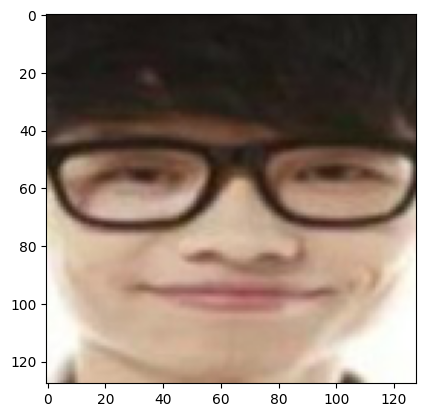

In [ ]:
plt.imshow(X[Y==0][5])
plt.show

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[247, 250, 253],
        [246, 249, 252],
        [245, 248, 252],
        ...,
        [246, 249, 252],
        [246, 249, 253],
        [246, 249, 254]],

       [[232, 235, 240],
        [232, 235, 240],
        [230, 233, 238],
        ...,
        [231, 234, 239],
        [232, 235, 240],
        [235, 238, 243]],

       [[236, 239, 244],
        [236, 239, 244],
        [234, 237, 242],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [234, 237, 242]],

       ...,

       [[192, 190, 191],
        [146, 144, 145],
        [179, 176, 177],
        ...,
        [ 47,  40,  48],
        [ 44,  37,  45],
        [ 69,  62,  70]],

       [[165, 161, 162],
        [149, 145, 146],
        [181, 177, 178],
        ...,
        [ 45,  38,  46],
        [ 43,  36,  44],
        [ 68,  61,  69]],

       [[150, 146, 147],
        [152, 148, 149],
        [183, 179, 180],
        ...,
        [ 44,  37,  45],
        [ 43,  36,  44],
        [ 68,  61,  69]]

In [ ]:
X_train_scaled[0]

array([[[0.96862745, 0.98039216, 0.99215686],
        [0.96470588, 0.97647059, 0.98823529],
        [0.96078431, 0.97254902, 0.98823529],
        ...,
        [0.96470588, 0.97647059, 0.98823529],
        [0.96470588, 0.97647059, 0.99215686],
        [0.96470588, 0.97647059, 0.99607843]],

       [[0.90980392, 0.92156863, 0.94117647],
        [0.90980392, 0.92156863, 0.94117647],
        [0.90196078, 0.91372549, 0.93333333],
        ...,
        [0.90588235, 0.91764706, 0.9372549 ],
        [0.90980392, 0.92156863, 0.94117647],
        [0.92156863, 0.93333333, 0.95294118]],

       [[0.9254902 , 0.9372549 , 0.95686275],
        [0.9254902 , 0.9372549 , 0.95686275],
        [0.91764706, 0.92941176, 0.94901961],
        ...,
        [0.92156863, 0.93333333, 0.95294118],
        [0.92156863, 0.93333333, 0.95294118],
        [0.91764706, 0.92941176, 0.94901961]],

       ...,

       [[0.75294118, 0.74509804, 0.74901961],
        [0.57254902, 0.56470588, 0.56862745],
        [0.70196078, 0

In [ ]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, 2)

**Building a Convolutional Neural Networks(CNN)**
1)tensorflow
2)keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:


model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2, activation='softmax'))

In [ ]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
Y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.4875 - acc: 0.7859 - val_loss: 0.2622 - val_acc: 0.9025
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2717 - acc: 0.8911 - val_loss: 0.2210 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2239 - acc: 0.9163 - val_loss: 0.1792 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1871 - acc: 0.9286 - val_loss: 0.1596 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1594 - acc: 0.9410 - val_loss: 0.1715 - val_acc: 0.9322


**Model Evaluation**

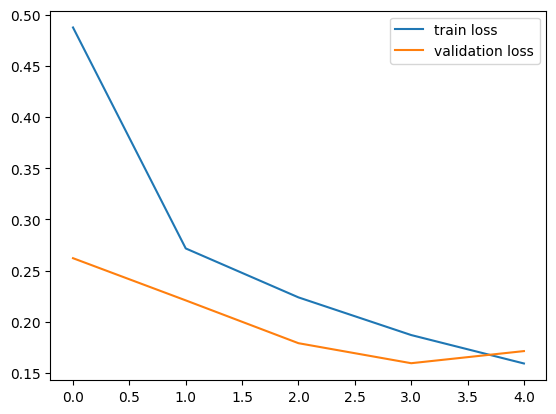

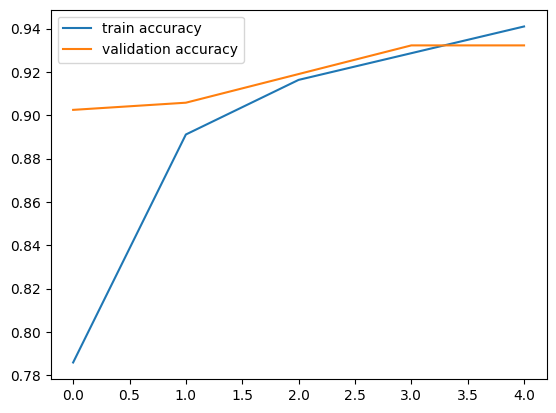

In [ ]:
h = history

# Plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()



# Plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving download (6).png to download (6).png
Saving pptfm.jpeg to pptfm.jpeg
User uploaded file "download (6).png" with length 3224274 bytes
User uploaded file "pptfm.jpeg" with length 5175 bytes


**Predictive System**

Path of the image to to be predicted: /content/pptfm.jpeg


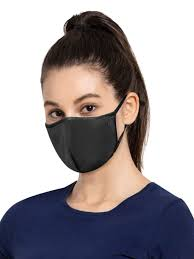

1/1 [==============================] - 0s 21ms/step
[[0. 1.]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
elif input_pred_label == 0:
  print('The person in the image is not wearing a mask')  
else:
  print('Plese show the face')  